# XGBOOST 2020, 2021, 2022

In [63]:
# Deze code is al gerund, dus opnieuw runnen heeft geen zin.
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def append_str_to_columns(df, str):
    new_columns = []
    for column in df.columns:
        if column != "gwb_code_10":
            new_columns.append(column + '{}'.format(str))
        else:
            new_columns.append(column)
    df.columns = new_columns
    return df


zorg21 = pd.read_csv('./data/zorg21.csv')
zorg21 = zorg21[zorg21['VormenVanJeugdzorg'] == 'T001203']
zorg21 = zorg21[zorg21['Wijken'].str[:2] != 'BU']
zorg21 = zorg21[['Wijken', 'p_jz_tn']]
kwb_2021 = pd.read_excel('./data/kwb-2021.xls')
kwb_2021 = kwb_2021.applymap(lambda x: x.strip() if isinstance(x, str) else x)
kwb_2021 = kwb_2021[kwb_2021['gwb_code_10'].str[:2] != 'BU']
kwb_2021 = kwb_2021[[x for x in kwb_2021.columns if "p_jz_tn" not in x ]]
kwb_2021= kwb_2021.merge(zorg21, left_on='gwb_code_10', right_on='Wijken', how='left')

zorg22 = pd.read_csv('./data/zorg22.csv')
zorg22 = zorg22[zorg22['VormenVanJeugdzorg'] == 'T001203']
zorg22 = zorg22[zorg22['Wijken'].str[:2] != 'BU']
zorg22 = zorg22[['Wijken', 'p_jz_tn']]
kwb_2022 = pd.read_excel('./data/kwb-2022.xls')
kwb_2022 = kwb_2022.applymap(lambda x: x.strip() if isinstance(x, str) else x)
kwb_2022 = kwb_2022[kwb_2022['gwb_code_10'].str[:2] != 'BU']
kwb_2022 = kwb_2022[[x for x in kwb_2022.columns if "p_jz_tn" not in x ]]
kwb_2022= kwb_2022.merge(zorg22, left_on='gwb_code_10', right_on='Wijken', how='left')

In [116]:
dflist = ["./data/kwb-2018.xls", "./data/kwb-2019.xlsx","./data/kwb-2020.xls", kwb_2021, kwb_2022]
columnlist = ["gwb_code_10", "p_00_14",	"p_15_24",	"p_25_44",	"p_45_64",	"p_65_oo",	"p_ongeh",	"p_gehuwd",	"p_gesch",	"p_verwed",	"p_marok", "p_jz_tn", "p_antaru",	"p_suri","p_tur", "p_hh_z_k",	"p_hh_m_k", "bev_dich", "p_koopw",	"p_huurw", "g_ink_po",	"g_ink_pi",	"p_ink_li",	"p_ink_hi",	"p_n_act",	"p_hh_li",	"p_hh_hi",	"p_hh_lkk",	"p_hh_osm",	"a_soz_wb",	"a_soz_ao",	"a_soz_ww",	"a_soz_ow"]
stringlist = ["_2018", "_2019", "_2020", "_2021", "_2022"]

dfs = pd.DataFrame
for i in range(len(dflist)):
    if i == 0:
        print(dflist[i])
        df = pd.read_excel(dflist[i])
        df = df[df['gwb_code_10'].str[:2] != 'BU']
        df = df[df['gwb_code_10'].str[:2] != 'GM']
        df = df[df['gwb_code_10'].str[:2] != 'NL']
        df = df[[x for x in df.columns if x in columnlist]]
        df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
        df = df.replace([np.inf, -np.inf, np.nan, ".", "-"], np.nan)
        df = df.applymap(lambda x: str(x.replace(',','.')) if isinstance(x, str) else x)
        df = df.apply(pd.to_numeric, errors='ignore')
        df = df.fillna(df.mean())
        df = append_str_to_columns(df, stringlist[i])
        dfs = df
    elif 0 < i < 3:
        print(dflist[i])
        df = pd.read_excel(dflist[i])
        df = df[df['gwb_code_10'].str[:2] != 'BU']
        df = df[df['gwb_code_10'].str[:2] != 'GM']
        df = df[df['gwb_code_10'].str[:2] != 'NL']
        df = df[[x for x in df.columns if x in columnlist]]
        df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
        df = df.replace([np.inf, -np.inf, np.nan, ".", "-"], np.nan)
        df = df.applymap(lambda x: str(x.replace(',','.')) if isinstance(x, str) else x)
        df = append_str_to_columns(df, stringlist[i])
        dfs = pd.merge(dfs, df, on='gwb_code_10', how='outer')
    else:
        df = dflist[i]
        df = df[df['gwb_code_10'].str[:2] != 'BU']
        df = df[df['gwb_code_10'].str[:2] != 'GM']
        df = df[df['gwb_code_10'].str[:2] != 'NL']
        df = df[[x for x in df.columns if x in columnlist]]
        df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
        df = df.replace([np.inf, -np.inf, np.nan, ".", "-"], np.nan)
        df = df.applymap(lambda x: str(x.replace(',','.')) if isinstance(x, str) else x)
        df = append_str_to_columns(df, stringlist[i])
        dfs = pd.merge(dfs, df, on='gwb_code_10', how='outer')

./data/kwb-2018.xls


C:\Users\stanf\AppData\Local\Temp/ipykernel_5652/3222761454.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


./data/kwb-2019.xlsx
./data/kwb-2020.xls


In [122]:
from IPython.display import display

cols = sorted(dfs.columns)
cols.remove("gwb_code_10")
cols = ["gwb_code_10"] + cols
dfs = dfs[cols]

for x in dfs.columns:
    if "2018" in x:
        dfs[x] = dfs[x].fillna(dfs[x].mean())

dfs = dfs.ffill(axis='columns')
dfs = dfs.apply(pd.to_numeric, errors='ignore')

display(dfs)

,gwb_code_10,a_soz_ao_2018,a_soz_ao_2019,a_soz_ao_2020,a_soz_ao_2021,a_soz_ao_2022,a_soz_ow_2018,a_soz_ow_2019,a_soz_ow_2020,a_soz_ow_2021,...,p_jz_tn_2018,p_jz_tn_2019,p_jz_tn_2020,p_jz_tn_2021,p_jz_tn_2022,p_koopw_2018,p_koopw_2019,p_koopw_2020,p_koopw_2021,p_koopw_2022
0,WK000300,710.000000,730.000000,710.000000,710.000000,710.000000,2670.000000,2670.000000,2750.000000,2750.000000,...,9.900000,11.500000,10.200000,10.200000,10.200000,49.000000,48.000000,48.000000,48.000000,48.0
1,WK000500,580.000000,580.000000,580.000000,580.000000,580.000000,2080.000000,2080.000000,2080.000000,2080.000000,...,9.900000,9.900000,9.900000,9.900000,9.900000,69.000000,69.000000,69.000000,69.000000,69.0
2,WK000900,150.000000,150.000000,150.000000,150.000000,150.000000,1170.000000,1170.000000,1170.000000,1170.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,76.000000,76.000000,76.000000,76.000000,76.0
3,WK000901,50.000000,50.000000,50.000000,50.000000,50.000000,190.000000,190.000000,190.000000,190.000000,...,9.600000,9.600000,9.600000,9.600000,9.600000,78.000000,78.000000,78.000000,78.000000,78.0
4,WK001000,870.000000,870.000000,870.000000,870.000000,870.000000,4230.000000,4230.000000,4230.000000,4230.000000,...,10.600000,10.600000,10.600000,10.600000,10.600000,55.000000,55.000000,55.000000,55.000000,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,WK199102,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,8.408712,8.408712,8.408712,8.408712,17.272727,66.486352,66.486352,66.486352,66.486352,73.0
3706,WK199103,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,8.408712,8.408712,8.408712,8.408712,12.000000,66.486352,66.486352,66.486352,66.486352,76.0
3707,WK199104,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,8.408712,8.408712,8.408712,8.408712,16.739130,66.486352,66.486352,66.486352,66.486352,74.0
3708,WK199105,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,8.408712,8.408712,8.408712,8.408712,11.000000,66.486352,66.486352,66.486352,66.486352,74.0


In [131]:
dfs = dfs.drop("gwb_code_10", axis=1)

In [133]:
dfs.columns

Index(['a_soz_ao_2018', 'a_soz_ao_2019', 'a_soz_ao_2020', 'a_soz_ao_2021',
       'a_soz_ao_2022', 'a_soz_ow_2018', 'a_soz_ow_2019', 'a_soz_ow_2020',
       'a_soz_ow_2021', 'a_soz_ow_2022', 'a_soz_wb_2018', 'a_soz_wb_2019',
       'a_soz_wb_2020', 'a_soz_wb_2021', 'a_soz_wb_2022', 'a_soz_ww_2018',
       'a_soz_ww_2019', 'a_soz_ww_2020', 'a_soz_ww_2021', 'a_soz_ww_2022',
       'bev_dich_2018', 'bev_dich_2019', 'bev_dich_2020', 'bev_dich_2021',
       'bev_dich_2022', 'g_ink_pi_2018', 'g_ink_pi_2019', 'g_ink_pi_2020',
       'g_ink_pi_2021', 'g_ink_pi_2022', 'g_ink_po_2018', 'g_ink_po_2019',
       'g_ink_po_2020', 'g_ink_po_2021', 'g_ink_po_2022', 'p_hh_hi_2018',
       'p_hh_hi_2019', 'p_hh_hi_2020', 'p_hh_hi_2021', 'p_hh_hi_2022',
       'p_hh_li_2018', 'p_hh_li_2019', 'p_hh_li_2020', 'p_hh_li_2021',
       'p_hh_li_2022', 'p_hh_lkk_2018', 'p_hh_lkk_2019', 'p_hh_lkk_2020',
       'p_hh_lkk_2021', 'p_hh_lkk_2022', 'p_hh_osm_2018', 'p_hh_osm_2019',
       'p_hh_osm_2020', 'p_hh_osm_2

In [134]:
# Extract features and target variable
target = dfs['p_jz_tn_2022']
features = dfs[[x for x in dfs.columns if "2022" not in x]]

In [135]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 41.92223839221825
R^2 Score: -0.7390687498095876


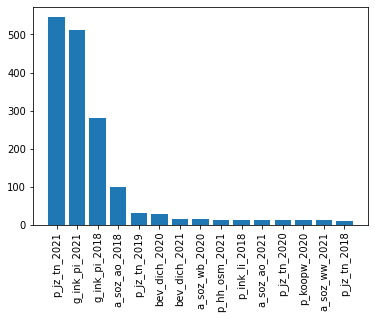

In [136]:
import matplotlib.pyplot as plt
feature_importance = sorted(xgb_model.get_booster().get_score(importance_type="gain").items(), key=lambda x:x[1], reverse=True)

features = list(zip(*feature_importance))[0]
importances = list(zip(*feature_importance))[1]

plt.bar(range(len(feature_importance[:15])), importances[:15], tick_label=features[:15])
plt.xticks(rotation = 90)
plt.show()

In [138]:
predictions_2023 = xgb_model.predict(dfs[[x for x in dfs.columns if "2018" not in x]])

# Optional: Save predictions to a CSV file
predictions_2023_df = pd.DataFrame({'p_jz_tn_2023': predictions_2023})
predictions_2023_df.to_csv('predictions_2023.csv', index=False)

ValueError: feature_names mismatch: ['a_soz_ao_2018', 'a_soz_ao_2019', 'a_soz_ao_2020', 'a_soz_ao_2021', 'a_soz_ow_2018', 'a_soz_ow_2019', 'a_soz_ow_2020', 'a_soz_ow_2021', 'a_soz_wb_2018', 'a_soz_wb_2019', 'a_soz_wb_2020', 'a_soz_wb_2021', 'a_soz_ww_2018', 'a_soz_ww_2019', 'a_soz_ww_2020', 'a_soz_ww_2021', 'bev_dich_2018', 'bev_dich_2019', 'bev_dich_2020', 'bev_dich_2021', 'g_ink_pi_2018', 'g_ink_pi_2019', 'g_ink_pi_2020', 'g_ink_pi_2021', 'g_ink_po_2018', 'g_ink_po_2019', 'g_ink_po_2020', 'g_ink_po_2021', 'p_hh_hi_2018', 'p_hh_hi_2019', 'p_hh_hi_2020', 'p_hh_hi_2021', 'p_hh_li_2018', 'p_hh_li_2019', 'p_hh_li_2020', 'p_hh_li_2021', 'p_hh_lkk_2018', 'p_hh_lkk_2019', 'p_hh_lkk_2020', 'p_hh_lkk_2021', 'p_hh_osm_2018', 'p_hh_osm_2019', 'p_hh_osm_2020', 'p_hh_osm_2021', 'p_huurw_2018', 'p_huurw_2019', 'p_huurw_2020', 'p_huurw_2021', 'p_ink_hi_2018', 'p_ink_hi_2019', 'p_ink_hi_2020', 'p_ink_hi_2021', 'p_ink_li_2018', 'p_ink_li_2019', 'p_ink_li_2020', 'p_ink_li_2021', 'p_jz_tn_2018', 'p_jz_tn_2019', 'p_jz_tn_2020', 'p_jz_tn_2021', 'p_koopw_2018', 'p_koopw_2019', 'p_koopw_2020', 'p_koopw_2021'] ['a_soz_ao_2019', 'a_soz_ao_2020', 'a_soz_ao_2021', 'a_soz_ao_2022', 'a_soz_ow_2019', 'a_soz_ow_2020', 'a_soz_ow_2021', 'a_soz_ow_2022', 'a_soz_wb_2019', 'a_soz_wb_2020', 'a_soz_wb_2021', 'a_soz_wb_2022', 'a_soz_ww_2019', 'a_soz_ww_2020', 'a_soz_ww_2021', 'a_soz_ww_2022', 'bev_dich_2019', 'bev_dich_2020', 'bev_dich_2021', 'bev_dich_2022', 'g_ink_pi_2019', 'g_ink_pi_2020', 'g_ink_pi_2021', 'g_ink_pi_2022', 'g_ink_po_2019', 'g_ink_po_2020', 'g_ink_po_2021', 'g_ink_po_2022', 'p_hh_hi_2019', 'p_hh_hi_2020', 'p_hh_hi_2021', 'p_hh_hi_2022', 'p_hh_li_2019', 'p_hh_li_2020', 'p_hh_li_2021', 'p_hh_li_2022', 'p_hh_lkk_2019', 'p_hh_lkk_2020', 'p_hh_lkk_2021', 'p_hh_lkk_2022', 'p_hh_osm_2019', 'p_hh_osm_2020', 'p_hh_osm_2021', 'p_hh_osm_2022', 'p_huurw_2019', 'p_huurw_2020', 'p_huurw_2021', 'p_huurw_2022', 'p_ink_hi_2019', 'p_ink_hi_2020', 'p_ink_hi_2021', 'p_ink_hi_2022', 'p_ink_li_2019', 'p_ink_li_2020', 'p_ink_li_2021', 'p_ink_li_2022', 'p_jz_tn_2019', 'p_jz_tn_2020', 'p_jz_tn_2021', 'p_jz_tn_2022', 'p_koopw_2019', 'p_koopw_2020', 'p_koopw_2021', 'p_koopw_2022']
expected a_soz_wb_2018, p_ink_hi_2018, g_ink_po_2018, p_hh_lkk_2018, a_soz_ao_2018, a_soz_ww_2018, p_hh_osm_2018, p_jz_tn_2018, bev_dich_2018, p_hh_li_2018, p_ink_li_2018, p_koopw_2018, a_soz_ow_2018, g_ink_pi_2018, p_huurw_2018, p_hh_hi_2018 in input data
training data did not have the following fields: bev_dich_2022, p_koopw_2022, p_huurw_2022, g_ink_po_2022, a_soz_ao_2022, a_soz_ow_2022, p_jz_tn_2022, g_ink_pi_2022, p_ink_hi_2022, p_hh_hi_2022, p_ink_li_2022, p_hh_li_2022, a_soz_wb_2022, a_soz_ww_2022, p_hh_lkk_2022, p_hh_osm_2022